<a href="https://colab.research.google.com/github/jgbrenner/psychometrics/blob/main/Rating_test_scoreC9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analiza oceny formularza przez sędziów: Perfekcjonizm**

#Wprowadzenie

Formularz oceniany przez sędziów miał na celu ocenę, na ile każde z zaproponowanych stwierdzeń odzwierciedla definicję perfekcjonizmu w odniesieniu do trzech wymiarów. Perfekcjonizm to wielowymiarowa cecha osobowości charakteryzująca się dążeniem do doskonałości, stawianiem zbyt wysokich standardów oraz krytyczną oceną siebie i innych. W oparciu o modele takie jak Wielowymiarowa Skala Perfekcjonizmu Frosta oraz Skala Hewitta i Fletta, przygotowano test składający się z 18 pytań, który miał na celu pomiar rodzaju i stopnia perfekcjonizmu w trzech wymiarach:


- Perfekcjonizm skierowany na siebie (PSS): Tendencja do wymagania perfekcji od siebie (pozycje 1-6).


- Perfekcjonizm skierowany na innych (PSI): Stawianie wysokich oczekiwań wobec innych i krytyczna ocena ich osiągnięć (pozycje 7-12).


- Perfekcjonizm przypisywany społecznie (PSP): Przekonanie, że inni oczekują od nas perfekcji (pozycje 13-18).


Sędziowie oceniali, na ile każde stwierdzenie jest zgodne z definicją, posługując się skalą od 1 do 5, gdzie 1 oznaczało "niezgodne z definicją", a 5 "całkowicie zgodne z definicją".

# Metody Analizy

W celu oceny wiarygodności formy oraz zgodności między sędziami przeprowadzono szereg analiz statystycznych, w tym:

**Współczynnik Alfy Cronbacha** - użyty do zmierzenia spójności wewnętrznej dla każdego z wymiarów.

**Alfa Krippendorffa** - zmierzono zgodność między sędziami, aby określić stopień zgodności ocen dla wszystkich pozycji.

**W Kendall'a** (współczynnik zgodności) - zbadano stopień zgodności między ocenami sędziów.

**Wskaźnik Content Validity Ratio** (CVR) - zmierzono stosunek zgodności do wymagań merytorycznych pozycji, aby ocenić, czy dane stwierdzenie jest "niezbędne" zgodnie z oceną sędziów.

Wyniki Przed Wykluczeniem Pozycji Jednomyślnie Ocenionych

Alfa Krippendorffa wynosiła 0.484, co wskazuje na umiarkowany poziom zgodności między sędziami.

Alfa Cronbacha dla poszczególnych wymiarów była następująca:

PSS: 0.898 (wysoka spójność wewnętrzna)


PSI: 0.686 (umiarkowana spójność)


PSP: 0.953 (bardzo wysoka spójność)


W Kendall'a wynosiło 0.741, co sugeruje stosunkowo wysoki poziom zgodności pomiędzy sędziami.



Wskaźnik Content Validity Ratio (CVR) został obliczony dla wszystkich 18 pozycji przed wykluczeniem jednomyślnie ocenionych pozycji. CVR dla każdej pozycji wskazywał, czy dana pozycja była uznana za niezbędną przez sędziów.



# Wykluczenie Pozycji O Jednomyślnej Ocenie

Pozycje, które zostały jednomyślnie ocenione przez wszystkich sędziów na 5 (czyli "całkowicie zgodne z definicją"), zostały wykluczone z dalszych analiz. Po ich wykluczeniu:


Alfa Krippendorffa wzrosła do 0.529, co sugeruje, że po usunięciu tych pozycji wzrosła ogólna zgodność między sędziami.


Alfa Cronbacha dla wymiarów również uległa zmianie:


PSS: 0.877

PSI: 0.702

PSP: 0.923

 W Kendall'a po wykluczeniu pozycji wyniosło 0.812, co wskazuje na wzrost zgodności ocen.

Wskaźniki CVR dla pozostałych pozycji wykazały nieco większą wartość, co sugeruje, że po usunięciu mniej użytecznych stwierdzeń oceniane elementy były lepiej dopasowane do definicji perfekcjonizmu.



#Wnioski

Analiza wyników oceny formularza przez sędziów ujawniła kilka kluczowych aspektów:


Wykluczenie pozycji jednomyślnie ocenionych na maksymalną wartość miało pozytywny wpływ na zgodność ocen i wiarygodność narzędzia.


Wysoka Alfa Cronbacha dla niektórych wymiarów (szczególnie PSP) wskazuje, że stwierdzenia w ramach tego wymiaru są spójne i dobrze mierzone.


Wskaźnik CVR pokazał, że pewne stwierdzenia mogły nie być postrzegane jako kluczowe przez wszystkich sędziów, co sugeruje potrzebę dalszej rewizji formy.


Podsumowując, formularz stanowi solidną podstawę do mierzenia wielowymiarowej cechy perfekcjonizmu, jednak pewne stwierdzenia mogą wymagać dalszej optymalizacji. Analizy oceny sedziow wspazuja, ze fomularz moze stanowic narzedzie o trafności i rzetelności odpoweidniej do mierzenia perfekcjonizm u i jego trzech wymiarow.

In [1]:
!pip install krippendorff
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.3 MB/s eta 0:00:00


# 1. Import Libraries

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import rankdata
from sklearn.decomposition import PCA
import krippendorff
import pingouin as pg

Mounted at /content/drive


# 2. Load the Data

In [3]:
 #Step 1: Load the Data
try:
    file_path = '/content/drive/My Drive/Colab Notebooks/C9_responses.csv'
    df = pd.read_csv(file_path, encoding='ISO-8859-2')
    print("File loaded successfully!")
except FileNotFoundError:
    print("File not found. Please check the file path.")
except UnicodeDecodeError:
    print("Could not decode file. Try using a different encoding.")

File loaded successfully!


# 3. Data Cleaning and Preparation

In [30]:
# Drop the Timestamp column as it's not needed for analysis
df_cleaned = df.drop(columns=['Timestamp'])

# Print the shape of the DataFrame after cleaning
print("\nShape of DataFrame after dropping 'Timestamp' column:", df_cleaned.shape)

# Shorten the item names to "PSS1", "PSS2", etc., for easier reference
item_mappings = {
    df_cleaned.columns[i]: f"PSS{i+1}" if i < 6 else f"PSI{i-5}" if i < 12 else f"PSP{i-11}"
    for i in range(len(df_cleaned.columns))
}

# Rename the columns with the shortened names
df_cleaned.rename(columns=item_mappings, inplace=True)

# Ensure all rating columns are numeric
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')

# Verify the cleaned data
print("\nCleaned DataFrame:")
print(df_cleaned.head())

# Print the shape of the cleaned DataFrame
print("\nShape of cleaned DataFrame:", df_cleaned.shape)


Shape of DataFrame after dropping 'Timestamp' column: (4, 18)

Cleaned DataFrame:
   PSS1  PSS2  PSS3  PSS4  PSS5  PSS6  PSI1  PSI2  PSI3  PSI4  PSI5  PSI6  \
0     5     5     5     5     5     5     5     5     5     5     5     5   
1     5     5     5     4     5     5     5     5     4     5     5     4   
2     5     5     4     5     5     5     5     5     5     5     4     5   
3     4     4     3     3     4     5     5     5     4     3     4     4   

   PSP1  PSP2  PSP3  PSP4  PSP5  PSP6  
0     5     5     5     5     5     5  
1     5     5     5     5     5     5  
2     5     5     5     5     4     4  
3     4     3     3     4     3     4  

Shape of cleaned DataFrame: (4, 18)


# 4. Print Legend of Item Mappings

In [31]:
# Print a legend mapping the original item descriptions to the shortened names
print("\nLegend of Item Mappings:")
for original, short in item_mappings.items():
    print(f"{short}: {original}")


Legend of Item Mappings:
PSS1: 1.   PSS1: Czuj?, ?e musz? by? doskona?y we wszystkim, co robi?.
PSS2: 2.   PSS2: Cz?sto czuj? si? zawiedziony, gdy nie osi?gam swoich wysokich standardów.
PSS3: 3.   PSS3: Nawet drobne b??dy wywo?uj? u mnie silny dyskomfort.
PSS4: 4.   PSS4: Czuj?, ?e musz? by? lepszy od innych, aby móc si? czu? spe?niony.
PSS5: 5.   PSS5: Cz?sto porównuj? si? z innymi, aby oceni? swoje osi?gni?cia.
PSS6: 6.   PSS6: Uwa?am, ?e nie mog? sobie pozwoli? na pora?k?.
PSI1: 7.  PSI7: Oczekuj?, ?e inni b?d? wykonywa? swoje zadania perfekcyjnie.
PSI2: 8.  PSI8: Krytycznie oceniam osi?gni?cia innych ludzi.
PSI3: 9.  PSI9: Cz?sto czuj?, ?e inni mog? zrobi? co? lepiej ni? to zrobili.
PSI4: 10. PSI10: Nie toleruj? b??dów pope?nianych przez innych.
PSI5: 11.  PSI11: Czuj? si? sfrustrowany, gdy inni nie spe?niaj? moich oczekiwa?.
PSI6: 12.  PSI12: Cz?sto wyra?am swoje niezadowolenie z pracy innych.
PSP1: 13.  PSP13: Czuj?, ?e inni oczekuj? ode mnie doskona?o?ci.
PSP2: 14.  PSP14: Mam

# 5. Assess Inter-Rater Reliability (Krippendorff's Alpha)

In [32]:
# Transpose the data for Krippendorff's Alpha calculation
# Rows: Items, Columns: Judges
ratings_matrix = df_cleaned.to_numpy().T

# Calculate Krippendorff's Alpha for ordinal data
alpha_score = krippendorff.alpha(ratings_matrix, level_of_measurement='ordinal')
print(f"\nKrippendorff's Alpha for Judge Ratings: {alpha_score:.3f}")


Krippendorff's Alpha for Judge Ratings: 0.484


# 6. Calculate and Visualize Cronbach's Alpha for Each Dimension


Cronbach's Alpha for PSS (Self-oriented Perfectionism): 0.898
Cronbach's Alpha for PSI (Other-oriented Perfectionism): 0.686
Cronbach's Alpha for PSP (Socially Prescribed Perfectionism): 0.953


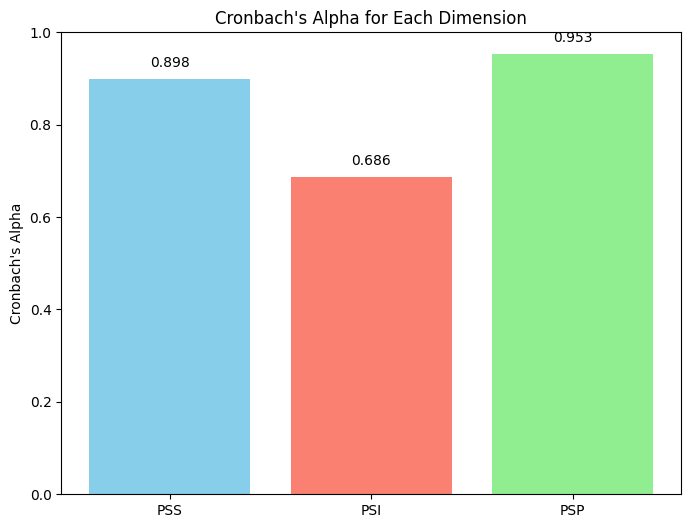

In [33]:
# Define the function to calculate Cronbach's Alpha
def cronbach_alpha(items_scores):
    items_scores = np.array(items_scores)
    item_variances = items_scores.var(axis=1, ddof=1)
    total_score_variance = items_scores.sum(axis=0).var(ddof=1)
    n_items = items_scores.shape[0]
    if n_items < 2:
        return None  # Not enough items to calculate Cronbach's Alpha
    return round((n_items / (n_items - 1)) * (1 - item_variances.sum() / total_score_variance), 3)

# Grouping questions by dimensions based on their prefixes
PSS_items = [col for col in df_cleaned.columns if col.startswith('PSS')]
PSI_items = [col for col in df_cleaned.columns if col.startswith('PSI')]
PSP_items = [col for col in df_cleaned.columns if col.startswith('PSP')]

# Create DataFrames for each dimension
PSS = df_cleaned[PSS_items]
PSI = df_cleaned[PSI_items]
PSP = df_cleaned[PSP_items]

# Calculate Cronbach's Alpha for each dimension
alpha_PSS = cronbach_alpha(PSS.values.T)
alpha_PSI = cronbach_alpha(PSI.values.T)
alpha_PSP = cronbach_alpha(PSP.values.T)

print(f"\nCronbach's Alpha for PSS (Self-oriented Perfectionism): {alpha_PSS}")
print(f"Cronbach's Alpha for PSI (Other-oriented Perfectionism): {alpha_PSI}")
print(f"Cronbach's Alpha for PSP (Socially Prescribed Perfectionism): {alpha_PSP}")

# Visualize Cronbach's Alpha using a bar chart
# Prepare data for plotting
alpha_values = [alpha_PSS, alpha_PSI, alpha_PSP]
dimensions = ['PSS', 'PSI', 'PSP']

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(dimensions, alpha_values, color=['skyblue', 'salmon', 'lightgreen'])
plt.ylim(0, 1)
plt.title("Cronbach's Alpha for Each Dimension")
plt.ylabel("Cronbach's Alpha")

# Annotate the bars with the alpha values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f'{yval:.3f}', ha='center', va='bottom')

# Show the plot
plt.show()


# 7. Calculate Kendall's W (Coefficient of Concordance)

In [34]:
# Rank the data for each judge
# Axis=1 to rank across items for each judge
ranked_data = df_cleaned.rank(axis=0, method='average')

# Sum of ranks for each item (row)
sum_ranks = ranked_data.sum(axis=1)

# Number of items and judges
n_items = df_cleaned.shape[0]  # Number of judges (rows)
m_judges = df_cleaned.shape[1]  # Number of items (columns)

# Calculate S (sum of squared deviations from the mean rank sum)
S = np.sum((sum_ranks - sum_ranks.mean())**2)

# Calculate Kendall's W
W = (12 * S) / (m_judges**2 * (n_items**3 - n_items))
W_rounded = round(W, 3)

print(f"\nKendall's W (Coefficient of Concordance): {W_rounded}")


Kendall's W (Coefficient of Concordance): 0.363


# 8. Visualize Mean Ratings with Radar Chart

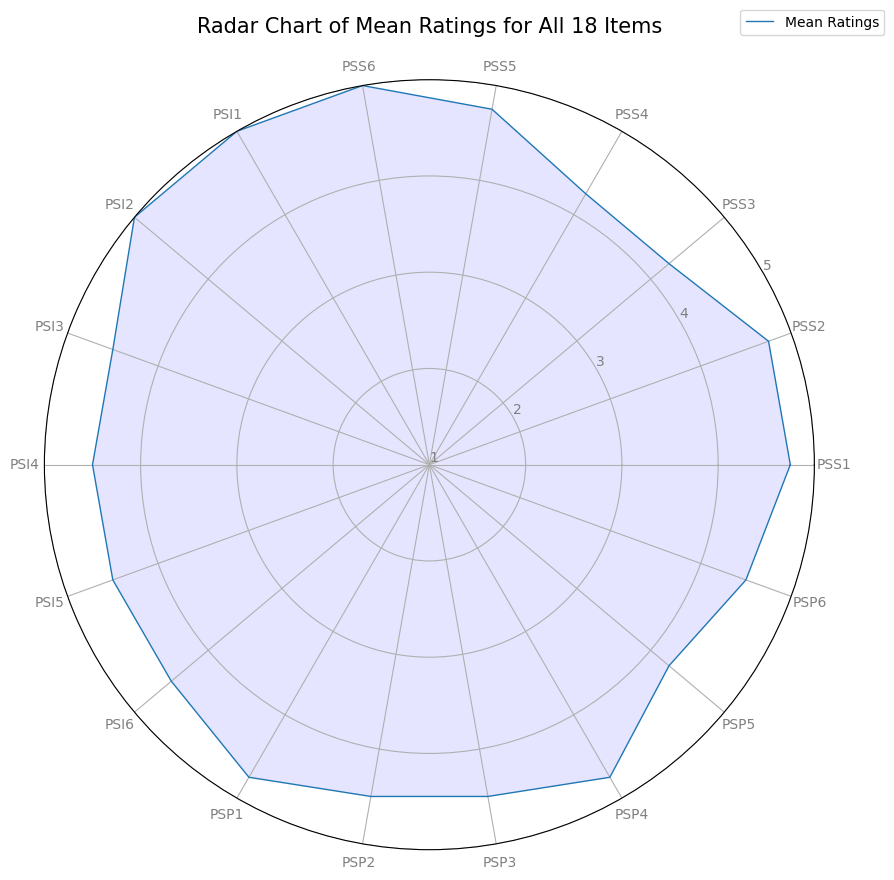

In [35]:
# Calculate the mean rating for each item
mean_ratings = df_cleaned.mean()

# Number of variables (items)
categories = list(mean_ratings.index)
N = len(categories)

# Mean ratings for radar chart
values = mean_ratings.values.flatten().tolist()
values += values[:1]  # Repeat the first value to close the circular graph

# Calculate the angles for each axis
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Initialize the radar plot
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Draw one axis per variable and add labels
plt.xticks(angles[:-1], categories, color='grey', size=10)

# Draw y-labels
ax.set_rlabel_position(30)
plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=10)
plt.ylim(1, 5)

# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid', label='Mean Ratings')
ax.fill(angles, values, 'b', alpha=0.1)

# Add title
plt.title('Radar Chart of Mean Ratings for All 18 Items', size=15, y=1.05)

# Show the plot
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

# 9. Identify and Exclude Unanimously Rated Items

In [36]:
# Calculate the variance of each item
variances = df_cleaned.var()

# Identify items with zero variance (unanimously rated items)
zero_variance_items = variances[variances == 0].index.tolist()
print(f"\nItems with zero variance (unanimously rated): {zero_variance_items}")

# Create a DataFrame excluding unanimously rated items
df_excluded = df_cleaned.drop(columns=zero_variance_items)
print("\nDataFrame after excluding unanimously rated items:")
print(df_excluded.head())


Items with zero variance (unanimously rated): ['PSS6', 'PSI1', 'PSI2']

DataFrame after excluding unanimously rated items:
   PSS1  PSS2  PSS3  PSS4  PSS5  PSI3  PSI4  PSI5  PSI6  PSP1  PSP2  PSP3  \
0     5     5     5     5     5     5     5     5     5     5     5     5   
1     5     5     5     4     5     4     5     5     4     5     5     5   
2     5     5     4     5     5     5     5     4     5     5     5     5   
3     4     4     3     3     4     4     3     4     4     4     3     3   

   PSP4  PSP5  PSP6  
0     5     5     5  
1     5     5     5  
2     5     4     4  
3     4     3     4  


# 10. Re-analysis After Excluding Unanimously Rated Items

Step 1: Update Item Groupings Based on Remaining Items

In [37]:
# Group remaining items by their dimensions
PSS_items_excluded = [col for col in df_excluded.columns if col.startswith('PSS')]
PSI_items_excluded = [col for col in df_excluded.columns if col.startswith('PSI')]
PSP_items_excluded = [col for col in df_excluded.columns if col.startswith('PSP')]

# Create DataFrames for each dimension
PSS_excluded = df_excluded[PSS_items_excluded]
PSI_excluded = df_excluded[PSI_items_excluded]
PSP_excluded = df_excluded[PSP_items_excluded]

Step 2: Recalculate Cronbach's Alpha for Each Dimension

In [38]:
# Calculate Cronbach's Alpha for each dimension after exclusion
alpha_PSS_excluded = cronbach_alpha(PSS_excluded.values.T) if not PSS_excluded.empty else None
alpha_PSI_excluded = cronbach_alpha(PSI_excluded.values.T) if not PSI_excluded.empty else None
alpha_PSP_excluded = cronbach_alpha(PSP_excluded.values.T) if not PSP_excluded.empty else None

print("\nCronbach's Alpha after excluding unanimously rated items:")
if alpha_PSS_excluded is not None:
    print(f"Cronbach's Alpha for PSS (Self-oriented Perfectionism): {alpha_PSS_excluded}")
else:
    print("Cronbach's Alpha for PSS: Not enough items to calculate.")

if alpha_PSI_excluded is not None:
    print(f"Cronbach's Alpha for PSI (Other-oriented Perfectionism): {alpha_PSI_excluded}")
else:
    print("Cronbach's Alpha for PSI: Not enough items to calculate.")

if alpha_PSP_excluded is not None:
    print(f"Cronbach's Alpha for PSP (Socially Prescribed Perfectionism): {alpha_PSP_excluded}")
else:
    print("Cronbach's Alpha for PSP: Not enough items to calculate.")



Cronbach's Alpha after excluding unanimously rated items:
Cronbach's Alpha for PSS (Self-oriented Perfectionism): 0.935
Cronbach's Alpha for PSI (Other-oriented Perfectionism): 0.762
Cronbach's Alpha for PSP (Socially Prescribed Perfectionism): 0.953


Step 3: Recalculate Krippendorff's Alpha

In [39]:
# Transpose the data for Krippendorff's Alpha calculation
ratings_matrix_excluded = df_excluded.to_numpy().T

# Calculate Krippendorff's Alpha for ordinal data after exclusion
alpha_score_excluded = krippendorff.alpha(ratings_matrix_excluded, level_of_measurement='ordinal')
print(f"\nKrippendorff's Alpha after excluding unanimously rated items: {alpha_score_excluded:.3f}")


Krippendorff's Alpha after excluding unanimously rated items: 0.651


Step 4: Recalculate Kendall's W

In [40]:
# Rank the data for each judge
ranked_data_excluded = df_excluded.rank(axis=0, method='average')

# Sum of ranks for each item (row)
sum_ranks_excluded = ranked_data_excluded.sum(axis=1)

# Number of items and judges after exclusion
n_items_excluded = df_excluded.shape[0]  # Number of judges (rows)
m_judges_excluded = df_excluded.shape[1]  # Number of items (columns)

# Calculate S (sum of squared deviations from the mean rank sum)
S_excluded = np.sum((sum_ranks_excluded - sum_ranks_excluded.mean())**2)

# Calculate Kendall's W after exclusion
W_excluded = (12 * S_excluded) / (m_judges_excluded**2 * (n_items_excluded**3 - n_items_excluded))
W_excluded_rounded = round(W_excluded, 3)

print(f"\nKendall's W after excluding unanimously rated items: {W_excluded_rounded}")



Kendall's W after excluding unanimously rated items: 0.522


Step 5: Recalculate Content Validity Ratio (CVR)

In [41]:
# Number of judges
N_excluded = df_excluded.shape[0]  # Should be 4

# Define threshold for "essential" items (ratings of 4 or 5)
essential_threshold = 4

# Calculate CVR for each item
cvr_values_excluded = {}
for column in df_excluded.columns:
    n_e = (df_excluded[column] >= essential_threshold).sum()
    cvr = (n_e - (N_excluded / 2)) / (N_excluded / 2)
    cvr_values_excluded[column] = round(cvr, 3)

# Create a DataFrame for CVR values
cvr_df_excluded = pd.DataFrame(list(cvr_values_excluded.items()), columns=['Item', 'CVR'])
print("\nContent Validity Ratio (CVR) after excluding unanimously rated items:")
print(cvr_df_excluded)


Content Validity Ratio (CVR) after excluding unanimously rated items:
    Item  CVR
0   PSS1  1.0
1   PSS2  1.0
2   PSS3  0.5
3   PSS4  0.5
4   PSS5  1.0
5   PSI3  1.0
6   PSI4  0.5
7   PSI5  1.0
8   PSI6  1.0
9   PSP1  1.0
10  PSP2  0.5
11  PSP3  0.5
12  PSP4  1.0
13  PSP5  0.5
14  PSP6  1.0


Section 11: Compare Metrics Before and After Excluding Unanimously Rated Items

In [42]:
# --- Krippendorff's Alpha Comparison ---
print(f"\nKrippendorff's Alpha before exclusion: {alpha_score:.3f}")
print(f"Krippendorff's Alpha after exclusion: {alpha_score_excluded:.3f}")

# --- Kendall's W Comparison ---
print(f"\nKendall's W before exclusion: {W_rounded}")
print(f"Kendall's W after exclusion: {W_excluded_rounded}")

# --- Cronbach's Alpha Comparison ---
print("\nCronbach's Alpha Comparison:")
print(f"PSS before: {alpha_PSS}, after: {alpha_PSS_excluded}")
print(f"PSI before: {alpha_PSI}, after: {alpha_PSI_excluded}")
print(f"PSP before: {alpha_PSP}, after: {alpha_PSP_excluded}")


Krippendorff's Alpha before exclusion: 0.484
Krippendorff's Alpha after exclusion: 0.651

Kendall's W before exclusion: 0.363
Kendall's W after exclusion: 0.522

Cronbach's Alpha Comparison:
PSS before: 0.898, after: 0.935
PSI before: 0.686, after: 0.762
PSP before: 0.953, after: 0.953


# Section 12: Visualizations After Exclusion




Radar Chart After Excluding Unanimously Rated Items

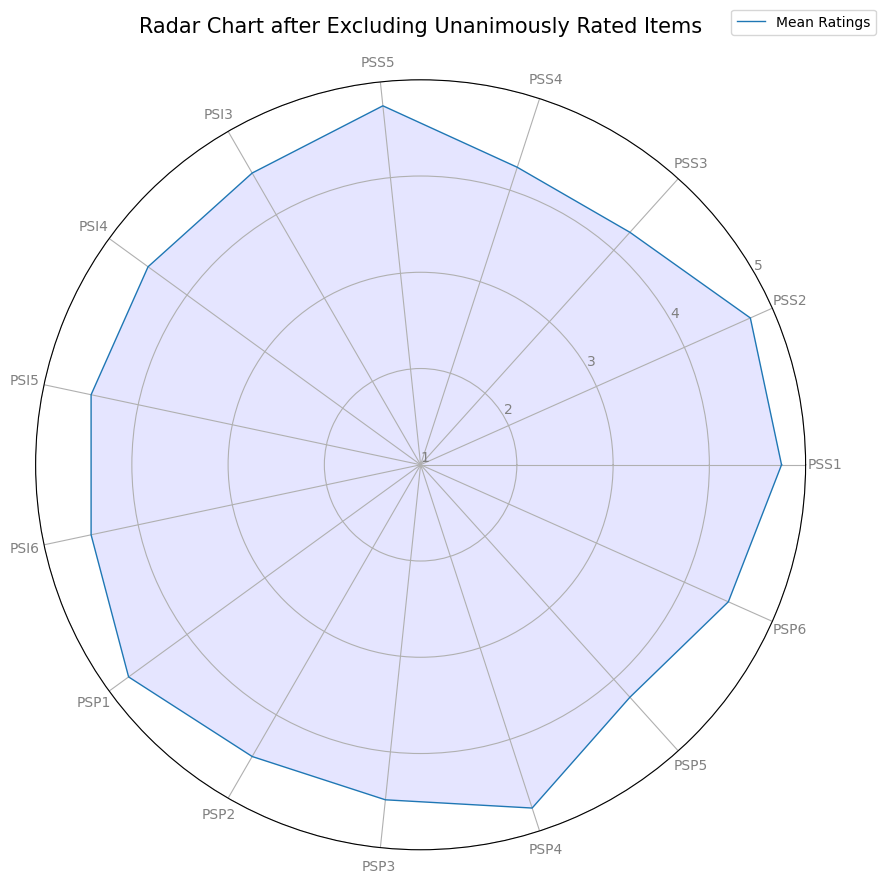

In [43]:
# Calculate the mean rating for each remaining item
mean_ratings_excluded = df_excluded.mean()

# Number of variables (items)
categories_excluded = list(mean_ratings_excluded.index)
N_excluded = len(categories_excluded)

# Mean ratings for radar chart
values_excluded = mean_ratings_excluded.values.flatten().tolist()
values_excluded += values_excluded[:1]

# Angles for each axis
angles_excluded = [n / float(N_excluded) * 2 * np.pi for n in range(N_excluded)]
angles_excluded += angles_excluded[:1]

# Initialize the radar plot
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Draw one axis per variable and add labels
plt.xticks(angles_excluded[:-1], categories_excluded, color='grey', size=10)

# Draw y-labels
ax.set_rlabel_position(30)
plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=10)
plt.ylim(1, 5)

# Plot data
ax.plot(angles_excluded, values_excluded, linewidth=1, linestyle='solid', label='Mean Ratings')
ax.fill(angles_excluded, values_excluded, 'b', alpha=0.1)

# Add title
plt.title('Radar Chart after Excluding Unanimously Rated Items', size=15, y=1.05)

# Show the plot
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

Correlation Matrix Heatmap After Exclusion

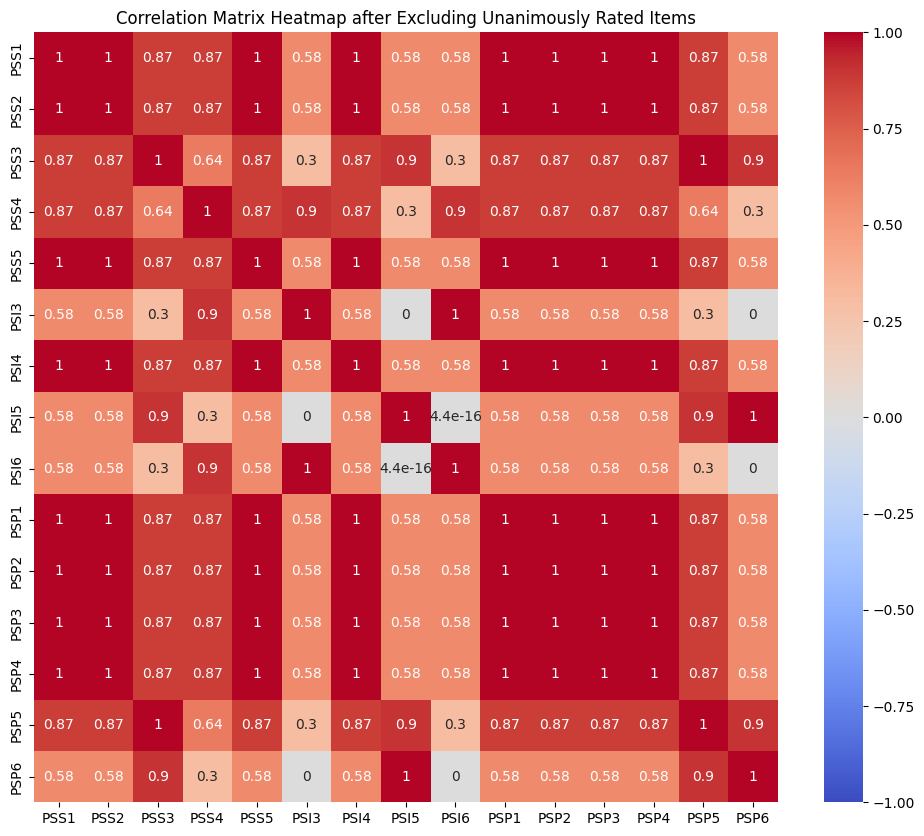

In [44]:
# Create a correlation matrix of the remaining items
correlation_matrix_excluded = df_excluded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_excluded, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix Heatmap after Excluding Unanimously Rated Items')
plt.show()